# Downloading SAMOS data from MarineFlux ERDDAP server

In [1]:
%pip install erddapy
%pip install cf_xarray
%pip install netCDF4
%pip install cartopy

from erddapy import ERDDAP
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import numpy.ma as ma
import cf_xarray

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Create the ERDDAP request

In [2]:
extent = [280.0, 300.0, 30.0, 45.0] # [lon-, lon+, lat-, lat+]
flux_algorithms = ["S88", "B23", "C36"]

In [3]:
erddap_samos = dict()
for algo in flux_algorithms:
  erddap_samos[algo] = ERDDAP(
    server="http://marineflux-erddap.coaps.fsu.edu/erddap",
    protocol="tabledap",
  )

  erddap_samos[algo].dataset_id = f"SAMOS_Fluxes_{algo}"
  erddap_samos[algo].constraints = {
      #"platform_call_sign=": "WTEC",
      "time>=": "2015-01-01T00:00:00Z",
      "time<=": "2016-01-01T00:00:00Z",
      "longitude>=": extent[0],
      "longitude<=": extent[1],
      "latitude>=": extent[2],
      "latitude<=": extent[3],
  }
  erddap_samos[algo].variables = [
      "platform_call_sign",
      "platform_name",
      "lhf",
      "lhf_qc",
      "shf",
      "shf_qc",
      "tau",
      "tau_qc"
  ]

### URLs for ERDDAP request can be retrieved

In [4]:
for algo in flux_algorithms:
    erddap_samos[algo].response = "csv"
    print(f'Download {algo} CSV: {erddap_samos[algo].get_download_url()}')

    erddap_samos[algo].response = "html"
    print(f'View {algo} download form on ERDDAP server: {erddap_samos[algo].get_download_url()}\n')

Download S88 CSV: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_S88.csv?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>=1420070400.0&time<=1451606400.0&longitude>=280.0&longitude<=300.0&latitude>=30.0&latitude<=45.0
View S88 download form on ERDDAP server: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_S88.html?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>=1420070400.0&time<=1451606400.0&longitude>=280.0&longitude<=300.0&latitude>=30.0&latitude<=45.0

Download B23 CSV: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_B23.csv?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>=1420070400.0&time<=1451606400.0&longitude>=280.0&longitude<=300.0&latitude>=30.0&latitude<=45.0
View B23 download form on ERDDAP server: http://marineflux-erddap.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_B23.html?platform_call_sign,platform_name,lhf,lhf_qc,shf,shf_qc,tau,tau_qc&time>

### Request data as CF compliant netCDF4-python object

In [5]:
nc = dict()

for algo in flux_algorithms:
    nc[algo] = erddap_samos[algo].to_ncCF()

    print(nc[algo])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    acknowledgement: NOAA/CPO/COM via award NA21OAR4310262
    cdm_data_type: Point
    comment: These data are all of the input variables and the relevant output variables of bulk flux calculations done on ship observations. When redundant instruments exist, the sensors used for calculations are chosen based on the amount of good data available, determined on a per day basis, using an updated method of the one described in Smith, S. R., N. Lopez, and M. A. Bourassa, 2016: SAMOS air-sea fluxes: 2005–2014. Geoscience Data Journal, 3, 9–19, https://doi.org/10.1002/gdj3.34.
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_name: Marine Data Center, Center for Ocean-Atmospheric Prediction Studies, Florida State University, Tallahassee, FL, 32306-2840, USA
    creator_type: institution
    creator_url: https://mdc.coaps.fsu.edu/
    date_created: 2025-03-19 22:24:11.904122+00:00
    date_mod

## Request data as pandas DataFrame

In [6]:
df = dict()

for algo in flux_algorithms:
    df[algo] = erddap_samos[algo].to_pandas()

    print(df[algo])

       platform_call_sign      platform_name  lhf (watts meter-2)  lhf_qc  \
0                 WDC9417  Atlantic Explorer            65.487138     4.0   
1                 WDC9417  Atlantic Explorer            62.593968     4.0   
2                 WDC9417  Atlantic Explorer           296.797409     1.0   
3                 WDC9417  Atlantic Explorer           313.013361     1.0   
4                 WDC9417  Atlantic Explorer           315.709280     1.0   
...                   ...                ...                  ...     ...   
899353            WDC9417  Atlantic Explorer            32.492376     1.0   
899354            WDC9417  Atlantic Explorer            31.949228     1.0   
899355            WDC9417  Atlantic Explorer            32.428618     1.0   
899356            WDC9417  Atlantic Explorer            33.790912     1.0   
899357            WDC9417  Atlantic Explorer            35.134515     1.0   

        shf (watts meter-2)  shf_qc  tau (newton meter-2)  tau_qc  
0      

## Request data as xarray Dataset

In [7]:
ds = dict()

for algo in flux_algorithms:
    ds[algo] = erddap_samos[algo].to_xarray(requests_kwargs={"timeout": 600})

    print(ds[algo])

<xarray.Dataset> Size: 72MB
Dimensions:             (row: 899358)
Coordinates:
    longitude           (row) float32 4MB ...
    latitude            (row) float32 4MB ...
    time                (row) datetime64[ns] 7MB ...
Dimensions without coordinates: row
Data variables:
    platform_call_sign  (row) object 7MB ...
    platform_name       (row) object 7MB ...
    lhf                 (row) float64 7MB ...
    lhf_qc              (row) float64 7MB ...
    shf                 (row) float64 7MB ...
    shf_qc              (row) float64 7MB ...
    tau                 (row) float64 7MB ...
    tau_qc              (row) float64 7MB ...
Attributes: (12/62)
    acknowledgement:           NOAA/CPO/COM via award NA21OAR4310262
    cdm_data_type:             Point
    comment:                   These data are all of the input variables and ...
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    creator_name:              Marine Data Center, Center for Ocean-Atmospher...
    creator_ty

### Show which vessels are present in this subset

In [8]:
print('\n'.join(map(str,list(set(zip(ds['C36']['platform_name'].data,ds['C36']['platform_call_sign'].data))))))

('Henry B. Bigelow', 'WTDF')
('Gordon Gunter', 'WTEO')
('Atlantic Explorer', 'WDC9417')
('Pisces', 'WTDL')
('Nancy Foster', 'WTER')
('Thomas Jefferson', 'WTEA')
('Atlantis', 'KAQP')


### Filter out data not flagged as "good"

In [9]:
vars = ['lhf', 'shf', 'tau']

for var in vars:
    
    for algo in flux_algorithms:

        if f'{var}_qc' in ds[algo]:
            good_indices = np.where((ds[algo][f'{var}_qc'].cf == 'good') == True)[0]
            mask = np.zeros(len(ds[algo][f'{var}'].data), dtype=bool)
            mask[good_indices] = True
            ds[algo][var].data[~mask] = np.nan
        

### Latent heat flux plotted as a function of time

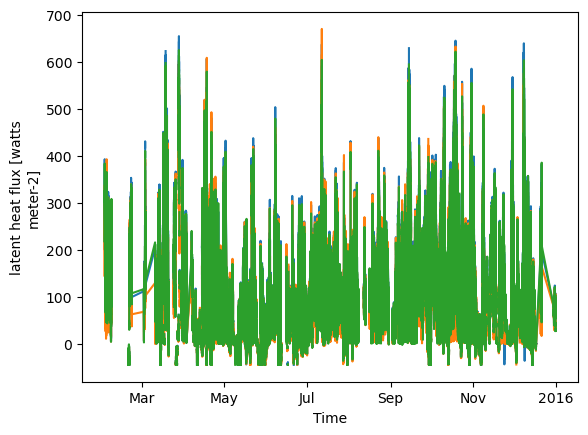

In [10]:
for algo in flux_algorithms:
    ds[algo]['lhf'].plot(x='time')

### Sensible and latent heat fluxes plotted on a map

In [11]:
def plot_shared_colorbar(dataset, vars, cmap='bwr', diverging=True, sort=False):
    height = 4
    figsize = (len(vars) * height, height)
    fig = plt.figure(figsize=figsize, layout='constrained')
    fig.suptitle(dataset.title)

    projection = ccrs.PlateCarree()

    ax_dict = fig.subplot_mosaic(
        [
            vars,
            ['cbar' for var in vars]
        ],
        height_ratios=[20, 1],
        per_subplot_kw={
            tuple(vars): {'projection': projection}
        }
    )

    vmax = -1
    for var in vars:
        ax_dict[var].set_extent(extent, crs=projection)
        ax_dict[var].stock_img()
        ax_dict[var].coastlines()
        ax_dict[var].set_title(f'{dataset[var].long_name} ({dataset[var].units})')

        vmax = max(vmax, ma.max(abs(ma.masked_invalid(ds[algo][var]))))

    if diverging:
        vmin = -vmax
    else:
        vmin = 0

    scatter = []
    for var in vars:
        # sorting the DataArray before plotting makes the higher values show up on top. this is useful for seeing where the high values are, but obscures the negative values.
        if sort:
            da = dataset[var].sortby(dataset[var])
        else:
            da = dataset[var]
        scatter.append(ax_dict[var].scatter(x=da['longitude'], y=da['latitude'], c=da, cmap=cmap, vmin=vmin, vmax=vmax))

    cbar = plt.colorbar(scatter[0], cax=ax_dict['cbar'], orientation='horizontal')

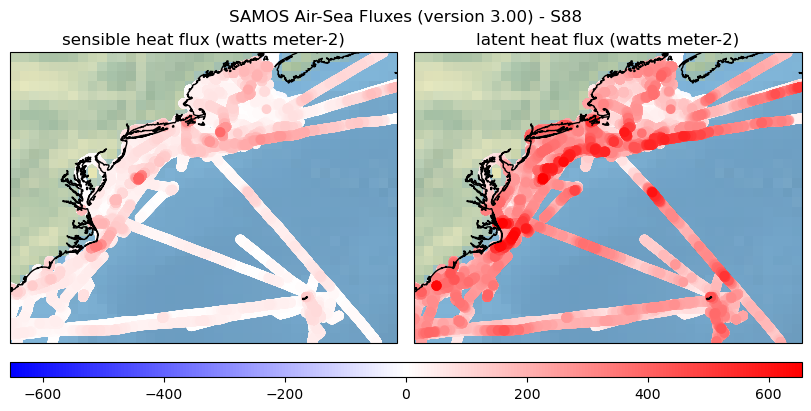

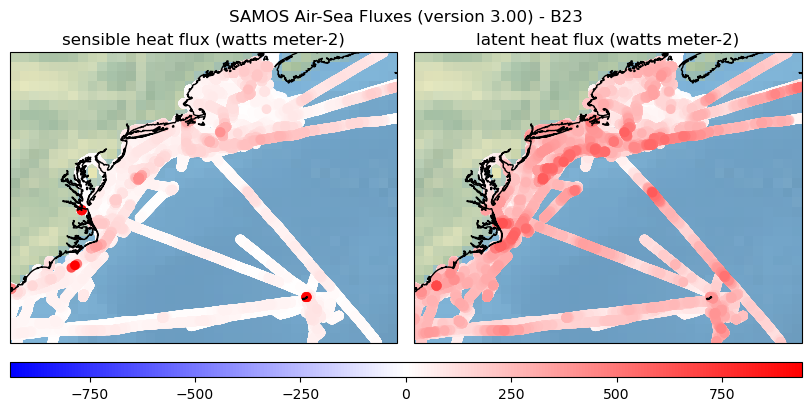

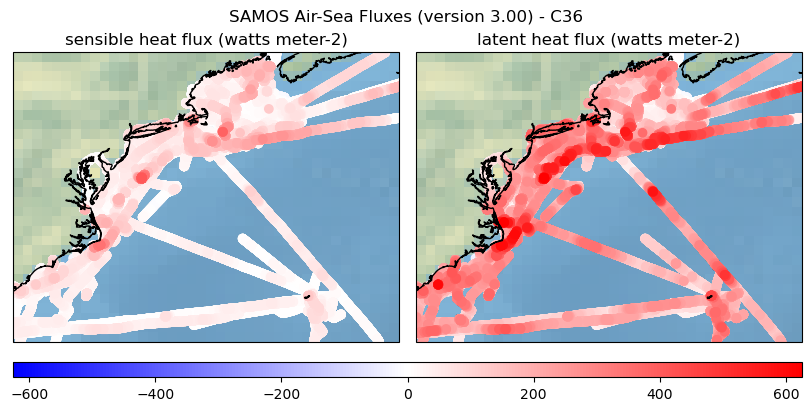

In [12]:
for algo in flux_algorithms:
    plot_shared_colorbar(ds[algo], ['shf', 'lhf'], sort=True)

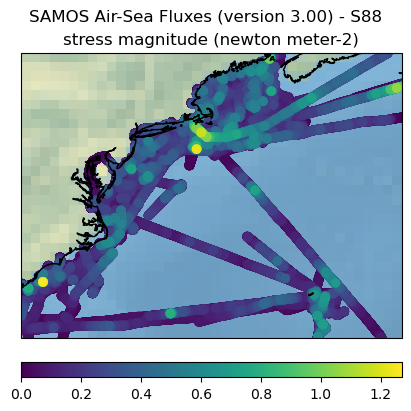

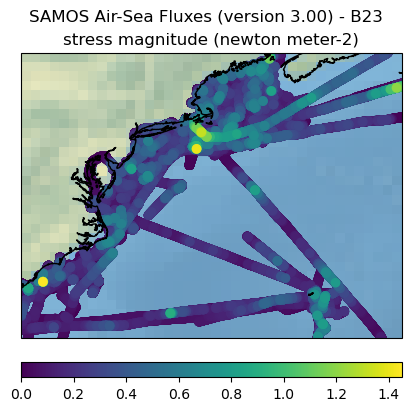

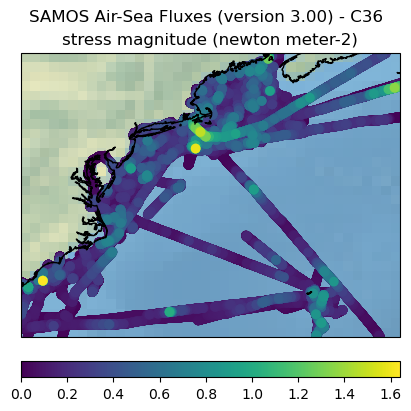

In [13]:
for algo in flux_algorithms:
    plot_shared_colorbar(ds[algo], ['tau'], cmap='viridis', diverging=False, sort=True)

In [14]:
def plot_dataset_comparison(datasets, var, sort=False, cmap='bwr', diverging=True):
    keys = list(datasets.keys())
    height = 4
    figsize = (len(datasets) * height, height)
    fig = plt.figure(figsize=figsize, layout='constrained')
    fig.suptitle(f'{ds[keys[0]][var].long_name} ({ds[keys[0]][var].units})')

    projection = ccrs.PlateCarree()

    ax_dict = fig.subplot_mosaic(
        [
            [algo for algo in keys],
            ['cbar' for algo in keys]
        ],
        height_ratios=[20, 1],
        per_subplot_kw={
            tuple(algo for algo in keys): {'projection': projection}
        }
    )

    vmax = -1
    for algo in keys:
            
        ax_dict[algo].set_extent(extent, crs=projection)
        ax_dict[algo].stock_img()
        ax_dict[algo].coastlines()
        ax_dict[algo].set_title(f'{datasets[algo][var].long_name} ({datasets[algo][var].units})')

        vmax = max(vmax, ma.max(abs(ma.masked_invalid(datasets[algo][var]))))

        ax_dict[algo].set_title(datasets[algo].title)

    if diverging:
        vmin = -vmax
    else:
        vmin = 0

    scatter = []
    for algo in keys:
        # sorting the DataArray before plotting makes the higher values show up on top. this is useful for seeing where the high values are, but obscures the negative values.
        if sort:
            da = datasets[algo][var].sortby(datasets[algo][var])
        else:
            da = datasets[algo][var]
        scatter.append(ax_dict[algo].scatter(x=da['longitude'], y=da['latitude'], c=da, cmap=cmap, vmin=vmin, vmax=vmax))

    cbar = plt.colorbar(scatter[0], cax=ax_dict['cbar'], orientation='horizontal')

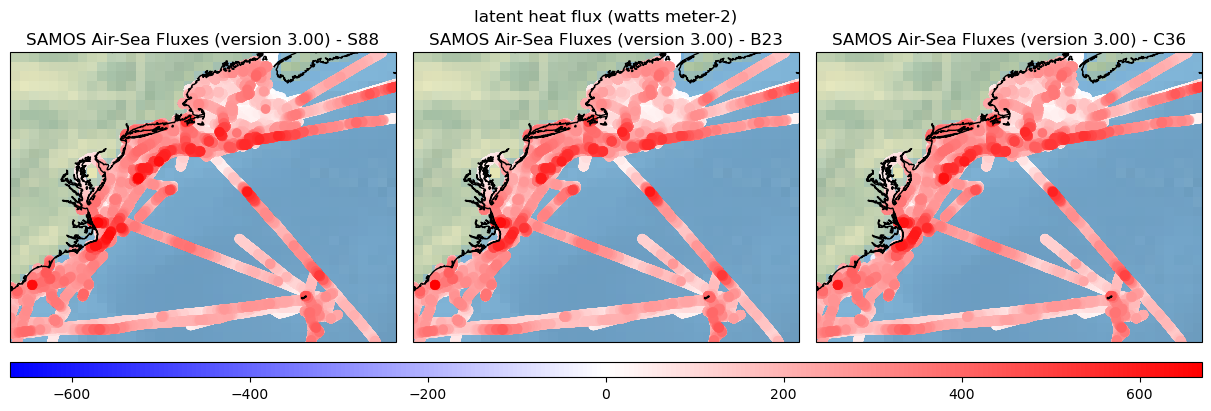

In [15]:
plot_dataset_comparison(ds, 'lhf', sort=True)

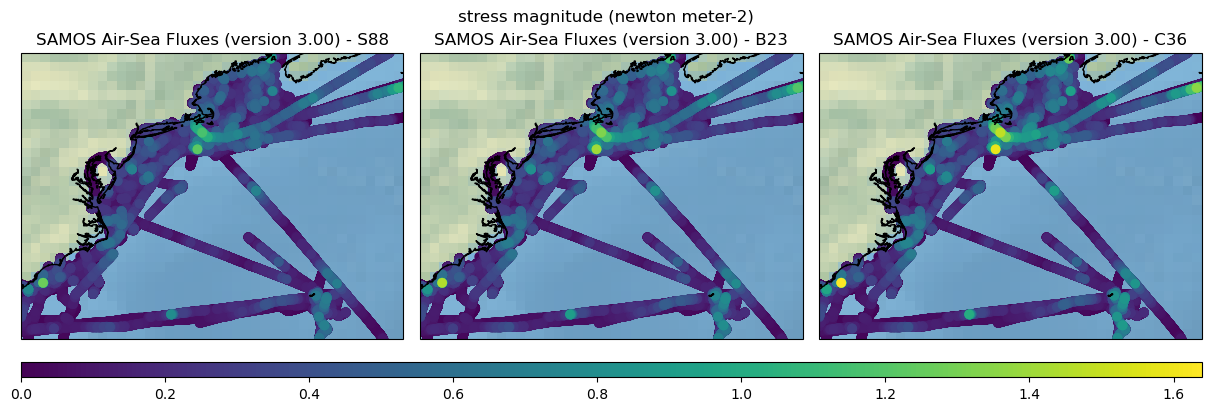

In [16]:
plot_dataset_comparison(ds, 'tau', cmap='viridis', diverging=False, sort=True)